# Corona's influence on young women's unemployment

**Imports and set magics:**

You may need to install geopandas and -c pyviz geoviews. Uncomment the following cells and run to install.  

In [318]:
#pip install geopandas
#conda install -c pyviz geoviews

In [276]:
# imports
import pandas as pd
import numpy as np
import matplotlib as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas_datareader 
import plotly.express as px
import statsmodels.formula.api as smf
import geopandas as gpd
import hvplot.pandas

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [277]:
# loading data
data = pd.read_excel('data.xlsx')
data.head()

,Country,year,Corona,untotal,unmen,unwomen,trade,Investment,fdi,Inflation,QGDP,Inequality,id,t
0,Australia,2019Q3,0.00,11.8,13.03,10.22,-0.3,1.1,NaN,1.67,0.8,1,1,1
1,Australia,2019Q4,0.00,11.91,13.14,10.43,-6.9,-0.6,NaN,1.84,0.4,1,1,2
2,Australia,2020Q1,176.79,12,13.59,10.75,-5.7,-0.5,3316.8,2.19,-0.3,1,1,3
3,Australia,2020Q2,130.33,15.35,16.08,14.62,-2.7,-4.8,251.8,-0.35,-6.8,1,1,4
4,Australia,2020Q3,743.60,14.96,15.73,13.99,2.1,0.7,6965.3,0.69,3.4,1,1,5


In [278]:
# dropping column variables
data2=data.drop(['fdi', 'untotal', 'Investment', 'Inflation', 'QGDP', 'Inequality'], axis=1)
display(data2)

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Australia,2019Q3,0.00,13.03,10.22,-0.3,1,1
1,Australia,2019Q4,0.00,13.14,10.43,-6.9,1,2
2,Australia,2020Q1,176.79,13.59,10.75,-5.7,1,3
3,Australia,2020Q2,130.33,16.08,14.62,-2.7,1,4
4,Australia,2020Q3,743.60,15.73,13.99,2.1,1,5
...,...,...,...,...,...,...,...,...
337,United States,2020Q3,13807.03,15.90,15.20,23.0,38,5
338,United States,2020Q4,38906.29,13.00,10.97,7.6,38,6
339,United States,2021Q1,31167.54,11.97,10.13,6.3,38,7
340,United States,2021Q2,9595.44,10.90,9.33,6.8,38,8


In [279]:
# dropping row variables that are not EU countries
I = data2.Country.str.contains('Australia')
I |= data2.Country.str.contains('Canada')
I |= data2.Country.str.contains('Chile')
I |= data2.Country.str.contains('Colombia')
I |= data2.Country.str.contains('Costa Rica')
I |= data2.Country.str.contains('Iceland')
I |= data2.Country.str.contains('Israel')
I |= data2.Country.str.contains('Japan')
I |= data2.Country.str.contains('Korea')
I |= data2.Country.str.contains('Mexico')
I |= data2.Country.str.contains('New Zealand')
I |= data2.Country.str.contains('Norway')
I |= data2.Country.str.contains('Switzerland')
I |= data2.Country.str.contains('Turkey')
I |= data2.Country.str.contains('United Kingdom')
I |= data2.Country.str.contains('United States')

data2.loc[I, :]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Australia,2019Q3,0.00,13.03,10.22,-0.3,1,1
1,Australia,2019Q4,0.00,13.14,10.43,-6.9,1,2
2,Australia,2020Q1,176.79,13.59,10.75,-5.7,1,3
3,Australia,2020Q2,130.33,16.08,14.62,-2.7,1,4
4,Australia,2020Q3,743.60,15.73,13.99,2.1,1,5
...,...,...,...,...,...,...,...,...
337,United States,2020Q3,13807.03,15.90,15.20,23.0,38,5
338,United States,2020Q4,38906.29,13.00,10.97,7.6,38,6
339,United States,2021Q1,31167.54,11.97,10.13,6.3,38,7
340,United States,2021Q2,9595.44,10.90,9.33,6.8,38,8


In [280]:
data2 = data2.loc[I == False] # keep everything else
data2.head(10)

,Country,year,Corona,unmen,unwomen,trade,id,t
9,Austria,2019Q3,0.00,10.50,8.97,-1.8,2,1
10,Austria,2019Q4,0.00,10.47,7.73,-0.7,2,2
11,Austria,2020Q1,1125.72,11.13,8.90,-1.1,2,3
12,Austria,2020Q2,838.87,15.27,13.17,-16.5,2,4
13,Austria,2020Q3,2990.91,12.40,10.53,21.6,2,5
14,Austria,2020Q4,34944.10,11.60,9.97,4.9,2,6
15,Austria,2021Q1,20503.43,12.00,12.80,7.7,2,7
16,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
17,Austria,2021Q3,10029.00,10.10,10.17,-0.2,2,9
18,Belgium,2019Q3,0.00,13.20,11.70,-1.8,3,1


In [281]:
data2.reset_index(inplace = True, drop = True) # drop old index too
data2.iloc[0:300,:]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Austria,2019Q3,0.00,10.50,8.97,-1.8,2,1
1,Austria,2019Q4,0.00,10.47,7.73,-0.7,2,2
2,Austria,2020Q1,1125.72,11.13,8.90,-1.1,2,3
3,Austria,2020Q2,838.87,15.27,13.17,-16.5,2,4
4,Austria,2020Q3,2990.91,12.40,10.53,21.6,2,5
...,...,...,...,...,...,...,...,...
193,Sweden,2020Q3,2443.59,27.73,25.30,17.1,34,5
194,Sweden,2020Q4,33908.52,24.67,22.67,6.1,34,6
195,Sweden,2021Q1,36171.38,25.23,23.80,6.3,34,7
196,Sweden,2021Q2,28036.67,27.73,23.90,9.0,34,8


**Data for 2021Q2**

In [282]:
# only keeping 2021Q2 in 'year'
T = data2.year.str.contains('2021Q2')
data2.loc[T, :]

,Country,year,Corona,unmen,unwomen,trade,id,t
7,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
16,Belgium,2021Q2,17373.73,18.00,20.70,11.6,3,8
25,Czech Republic,2021Q2,12567.70,7.40,8.57,3.0,8,8
34,Denmark,2021Q2,10791.46,NaN,NaN,4.1,9,8
43,Estonia,2021Q2,18566.42,15.93,19.07,7.6,10,8
52,Finland,2021Q2,3232.49,21.07,18.13,5.8,11,8
61,France,2021Q2,16766.01,19.23,20.23,1.6,12,8
70,Germany,2021Q2,10628.72,7.50,6.70,1.5,13,8
79,Greece,2021Q2,15248.66,34.94,43.77,3.9,14,8
88,Hungary,2021Q2,16155.32,11.80,16.50,0.6,15,8


In [283]:
data3 = data2.loc[T == True] # keep everything else

In [284]:
data3.reset_index(inplace = True, drop = True) # drop old index too
data3.iloc[0:300,:]

,Country,year,Corona,unmen,unwomen,trade,id,t
0,Austria,2021Q2,11514.23,12.10,11.90,2.3,2,8
1,Belgium,2021Q2,17373.73,18.00,20.70,11.6,3,8
2,Czech Republic,2021Q2,12567.70,7.40,8.57,3.0,8,8
3,Denmark,2021Q2,10791.46,NaN,NaN,4.1,9,8
4,Estonia,2021Q2,18566.42,15.93,19.07,7.6,10,8
5,Finland,2021Q2,3232.49,21.07,18.13,5.8,11,8
6,France,2021Q2,16766.01,19.23,20.23,1.6,12,8
7,Germany,2021Q2,10628.72,7.50,6.70,1.5,13,8
8,Greece,2021Q2,15248.66,34.94,43.77,3.9,14,8
9,Hungary,2021Q2,16155.32,11.80,16.50,0.6,15,8


# Explore data for 2021Q2

### Sub plot

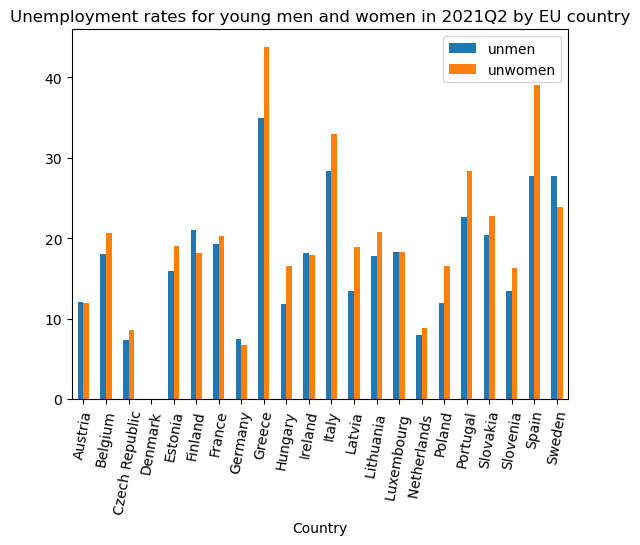

In [285]:
# creating sub plot
fig, ax = plt.subplots()
data3.plot.bar(x = 'Country', y = ['unmen', 'unwomen'], rot = 80, ax = ax, title='Unemployment rates for young men and women in 2021Q2 by EU country') ;

The tendencies for all countries is that women's unemployment is higher than men's unemployment in the second quarter of 2021.

### Geomapping

In [286]:
# get country data
url = "https://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson"
world = gpd.read_file(url)
#world.plot()

In [287]:
display(world)

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [288]:
world = world.copy()                                     
world.columns = ["OBJECTID", "Country", "geometry"] 
display(world)     

,OBJECTID,Country,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [289]:
coronanumbers = world.merge(data3, on='Country', how='left')
coronanumbers.dtypes

OBJECTID       int64
Country       object
geometry    geometry
year          object
Corona       float64
unmen        float64
unwomen      float64
trade        float64
id           float64
t            float64
dtype: object

In [290]:
coronanumbers = coronanumbers.drop(['unmen', 'trade', 'id', 't'], axis=1)
coronanumbers = coronanumbers.dropna(subset='Corona')

In [291]:
display(coronanumbers)

,OBJECTID,Country,geometry,year,Corona,unwomen
12,13,Austria,"POLYGON ((10.47124 46.87135, 10.48821 46.93599...",2021Q2,11514.23,11.90
19,20,Belgium,"POLYGON ((6.39820 50.32317, 6.34972 50.31277, ...",2021Q2,17373.73,20.70
55,56,Denmark,"MULTIPOLYGON (((8.41580 56.67813, 8.44346 56.6...",2021Q2,10791.46,NaN
62,63,Ireland,"MULTIPOLYGON (((-9.00148 53.14559, -9.03965 53...",2021Q2,7240.15,17.97
64,65,Estonia,"MULTIPOLYGON (((27.37206 57.53564, 27.31028 57...",2021Q2,18566.42,19.07
68,69,Czech Republic,"POLYGON ((18.14528 49.14500, 18.14944 49.12139...",2021Q2,12567.70,8.57
70,71,Finland,"MULTIPOLYGON (((29.99671 63.74802, 29.99895 63...",2021Q2,3232.49,18.13
77,78,France,"MULTIPOLYGON (((6.24375 46.31551, 6.23000 46.3...",2021Q2,16766.01,20.23
87,88,Germany,"MULTIPOLYGON (((7.36901 49.16878, 7.36403 49.1...",2021Q2,10628.72,6.70
91,92,Greece,"MULTIPOLYGON (((21.08305 39.05666, 21.04528 39...",2021Q2,15248.66,43.77


In [292]:
#ax = coronanumbers.plot(figsize=(15, 10), column='Corona', cmap=plt.cm.jet, k=9, alpha=1, legend=True, markersize = 0.5 )

In [293]:
coronanumbers.hvplot(coastline=True, c='Corona', cmap=plt.cm.jet, width=700,height=500, title='Coronacases in 2021Q2 by EU country') 

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (Corona)
   .Coastline.I :Feature   [Longitude,Latitude]

In [294]:
coronanumbers.hvplot(coastline=True, c='unwomen', cmap=plt.cm.jet, width=700,height=500, title='Unemployment rate for young women in 2021Q2 by EU country') 

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (unwomen)
   .Coastline.I :Feature   [Longitude,Latitude]

# Explore data for entire time period

### Interactive scatter plot

In [295]:
def _plot_timeseries(df, year):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)

    T = data2.year.str.contains(year)
    data2.loc[T, :]
    df = data2.loc[T == True]
    df = df.dropna() # can't run regression on na values
    
    ax.scatter(df.Corona, df.unwomen, label = "Corona Cases")
    
    # regression with 0 gives errors, safe way to deal with it
    try:
        z = np.polyfit(df.Corona.values, df.unwomen.values, 1)
        p = np.poly1d(z)
        ax.plot(df.Corona, p(df.Corona), label = "Trendline", color = "red", linestyle="--")
    except:
        pass

    ax.set_title(f"Corona cases and women's unemployment rate for {year}")
    ax.set_xlabel("Corona cases")
    ax.set_ylabel("Unemployment")
    ax.legend(loc=1)

def plot_timeseries(df):
    widgets.interact(_plot_timeseries, 
    df = widgets.fixed(df),
    year = widgets.Dropdown(
        description='Year', 
        options=df.year.unique(),
        value=df.year.unique()[0]),         
    );  

plot_timeseries(data2)

interactive(children=(Dropdown(description='Year', options=('2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', …

## Analysis

We want to investigate the effect of corona on the unemployment rate for young women by using a fixed effect estimation. We assume that there exist unobservable time invariant variables for example gender, marriage, nationality etc., which are relevant for our model. Thus, we are using fixed effect estimation to be able to remove these variables and create a consistent model. We are using trade and the unemployment rate for men as control variables.

In [317]:
results_fe1 = smf.ols("unwomen ~ Corona + unmen + trade + C(t)", data=data2).fit()
print(results_fe1.summary())

                            OLS Regression Results                            
Dep. Variable:                unwomen   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     56.73
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.97e-52
Time:                        13:31:41   Log-Likelihood:                -553.40
No. Observations:                 191   AIC:                             1131.
Df Residuals:                     179   BIC:                             1170.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7513      1.206     -1.452      0.1

The model is predicting the unemployment rate from 2019Q3-2021Q3. In 2019Q3 it is predicted to be -1.7513, in 2019Q4 to be -1.8925 (-1.7513-0.1412) and so on. Corona appears to be insignificant, which indicating that it does not have any effect on the unemployment rate for young women. This is also the case for the trade variable. Whereas the unemployment rate for men is significant, which is expected. Hereby, we can conclude that the unemployment rate for men affects the unemployment rate for women. 

# Conclusion

We have investigated corona's influence on young women's unemployment using descriptive plot and fixed effect estimation. We find that there is no correlation between the numbers of corona cases and women's unemployment. For further investigation of the model, it could be relevant to include variables as GDP, investment ect. since it is highly possible that it affects the unemployment rate of young women.